# Import All Libraries

In [1]:
import pandas as pd     # pip install pandas
import numpy as np      # pip install numpy
import seaborn as sns   # pip install seaborn 
import datetime
import matplotlib.pyplot as plt     # pip install matplotlib
import missingno as msno            # pip install missingno

# Import Dataset

In [2]:
df = pd.read_csv('./data.csv')

# Dataset Statistics

In [3]:
print(f'No of observations (Rows): {df.shape[0]}')
print(f'No of variables (Columns): {df.shape[1]}')
print(f'Duplicate rows: {df.duplicated().sum()}')

mc = 0
for i, j in dict(df.isnull().sum()).items(): mc += int(j)   # for getting columns that come with less than 0.5 percent NaN values
print(f'Missing cells: {mc}')
print(f'Missing cells(%): {mc * 100 / (df.shape[0] * df.shape[1])}%')




No of observations (Rows): 191393
No of variables (Columns): 24
Duplicate rows: 0
Missing cells: 94759
Missing cells(%): 2.0629237572255343%


# Variable Types

In [4]:
# Convert columns to best data types
df['date_added'] = pd.to_datetime(df['date_added'])

In [5]:
print(df.dtypes)

property_id               int64
location_id               int64
page_url                 object
property_type            object
price                     int64
price_bin                object
location                 object
city                     object
province_name            object
locality                 object
latitude                float64
longitude               float64
baths                     int64
area                     object
area_marla              float64
area_sqft               float64
purpose                  object
bedrooms                  int64
date_added       datetime64[ns]
year                      int64
month                     int64
day                       int64
agency                   object
agent                    object
dtype: object


In [6]:
# count same variables data type
my_dict = {i:list(df.dtypes).count(i) for i in list(df.dtypes)}
for i, j in my_dict.items():
    print(f'Variable type: {i}, Count: {j}')

Variable type: int64, Count: 8
Variable type: object, Count: 11
Variable type: float64, Count: 4
Variable type: datetime64[ns], Count: 1


# Missing values

<AxesSubplot:>

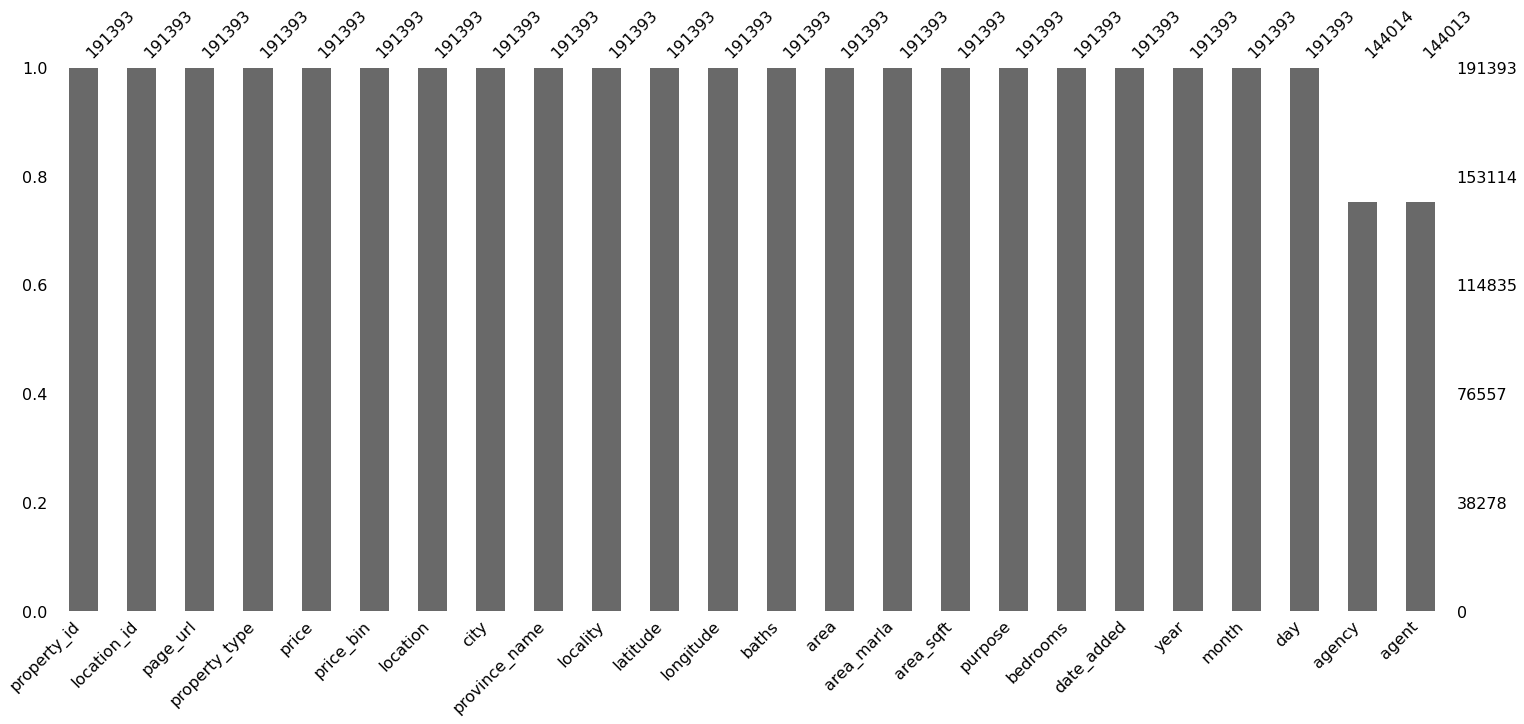

In [7]:
# create a bar chart of the missing values
msno.bar(df)

<AxesSubplot:>

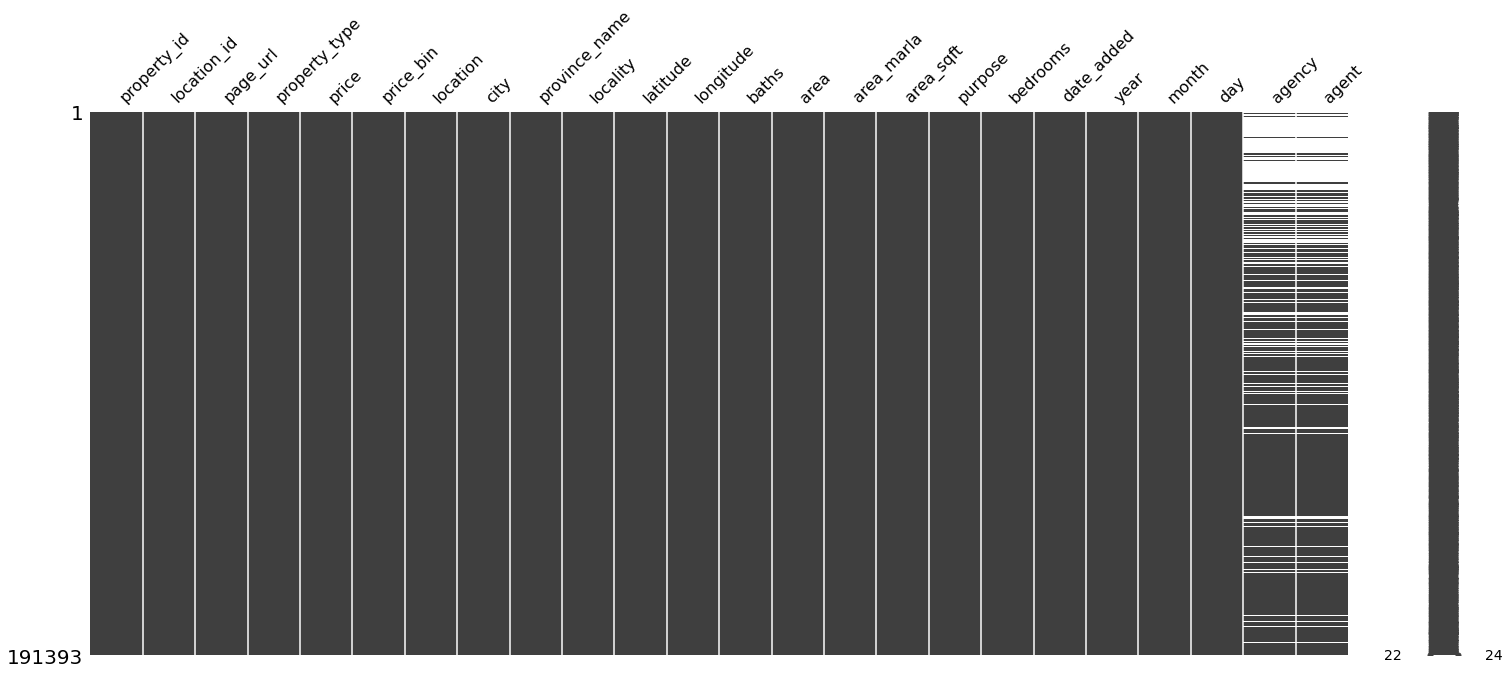

In [8]:
# create positional information of the missing values
msno.matrix(df)

<AxesSubplot:>

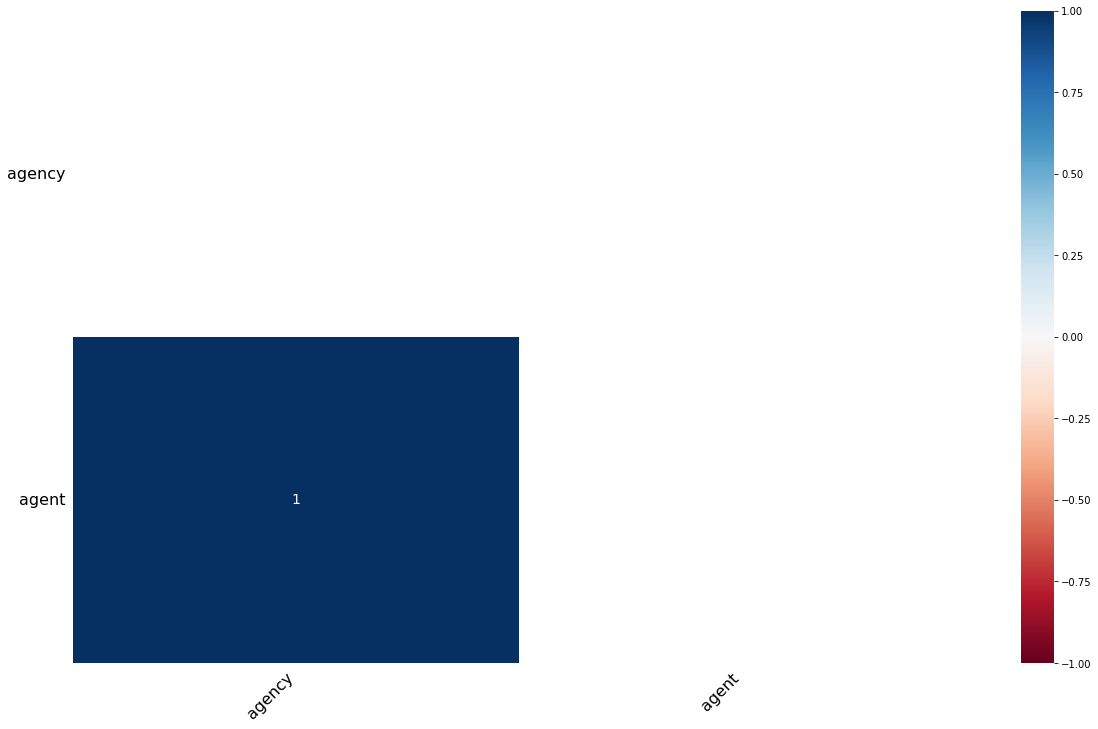

In [9]:
# create a heatmap of how missing values are related
msno.heatmap(df)

# Sample

- ## First Rows

In [10]:
df.head(5)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,2019-07-17,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,2018-10-06,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,2019-07-03,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,2019-04-04,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,2019-04-04,2019,4,4,NaN,NaN


- ## Last Rows

In [11]:
df.tail()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,Very High,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",...,12.4,3375.91,For Rent,3,2019-07-24,2019,7,24,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,Medium,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",...,12.4,3375.91,For Rent,2,2019-07-24,2019,7,24,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,High,G-10,Islamabad,Islamabad Capital,"G-10, Islamabad, Islamabad Capital",...,20.0,5445.02,For Rent,6,2019-07-24,2019,7,24,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,Low,DHA Defence,Islamabad,Islamabad Capital,"DHA Defence, Islamabad, Islamabad Capital",...,2.7,735.08,For Rent,2,2019-07-24,2019,7,24,New National Properties,TALHA MIAN AHMAD
191392,17468660,3421,https://www.zameen.com/Property/i_10_i_10_2_i_...,Upper Portion,26000,Low,I-10,Islamabad,Islamabad Capital,"I-10, Islamabad, Islamabad Capital",...,0.0,0.00,For Rent,3,2019-07-24,2019,7,24,Select Homes,"Qaiser Shahzad, Chaudhary Waseem"


# Remove missing values

- ## Remove columns with 95% NaN values 

In [12]:
for i, j in dict(df.isnull().sum()).items():    # for getting columns that come with less than 0.5 percent NaN values
    if int(df.shape[0]) * 95 / 100 < j:
        df = df.drop(i, axis=1)                 # dropping columns that come with 95% percent NaN values
df.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,2019-07-17,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,2018-10-06,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,2019-07-03,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,2019-04-04,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,2019-04-04,2019,4,4,NaN,NaN


- ## Drop NaN values cell

In [13]:
df = df.dropna()
df

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,2019-07-17,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,2018-10-06,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,2019-07-03,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
5,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,52000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,5,2019-06-02,2019,6,2,MATZ Services,Group Captain (R) Tajammul Baig
7,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000,High,EME Society,Lahore,Punjab,"EME Society, Lahore, Punjab",...,20.0,5445.02,For Sale,5,2019-07-03,2019,7,3,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,Very High,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",...,12.4,3375.91,For Rent,3,2019-07-24,2019,7,24,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,Medium,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",...,12.4,3375.91,For Rent,2,2019-07-24,2019,7,24,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,High,G-10,Islamabad,Islamabad Capital,"G-10, Islamabad, Islamabad Capital",...,20.0,5445.02,For Rent,6,2019-07-24,2019,7,24,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,Low,DHA Defence,Islamabad,Islamabad Capital,"DHA Defence, Islamabad, Islamabad Capital",...,2.7,735.08,For Rent,2,2019-07-24,2019,7,24,New National Properties,TALHA MIAN AHMAD


# Correlations

In [14]:
df.corr()

,property_id,location_id,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day
property_id,1.000000,-0.002764,-0.112201,0.037823,0.040613,-0.136773,0.001649,0.001649,-0.093526,0.235318,0.375019,0.109864
location_id,-0.002764,1.000000,-0.091685,-0.319226,-0.316023,-0.139412,-0.006277,-0.006277,-0.170148,0.004482,-0.010343,-0.022004
price,-0.112201,-0.091685,1.000000,-0.089110,-0.055683,0.213947,0.019659,0.019659,0.313657,-0.010134,-0.059769,-0.046921
latitude,0.037823,-0.319226,-0.089110,1.000000,0.917338,0.042402,0.008533,0.008533,0.020375,0.029013,0.031519,0.006756
longitude,0.040613,-0.316023,-0.055683,0.917338,1.000000,0.089241,0.007658,0.007658,0.074699,0.025945,0.035730,0.040208
baths,-0.136773,-0.139412,0.213947,0.042402,0.089241,1.000000,0.004371,0.004371,0.641813,-0.010733,-0.048169,-0.018537
area_marla,0.001649,-0.006277,0.019659,0.008533,0.007658,0.004371,1.000000,1.000000,0.007770,0.000460,0.003045,0.000283
area_sqft,0.001649,-0.006277,0.019659,0.008533,0.007658,0.004371,1.000000,1.000000,0.007770,0.000460,0.003045,0.000283
bedrooms,-0.093526,-0.170148,0.313657,0.020375,0.074699,0.641813,0.007770,0.007770,1.000000,-0.005941,-0.027107,-0.023173
year,0.235318,0.004482,-0.010134,0.029013,0.025945,-0.010733,0.000460,0.000460,-0.005941,1.000000,-0.329782,-0.005827


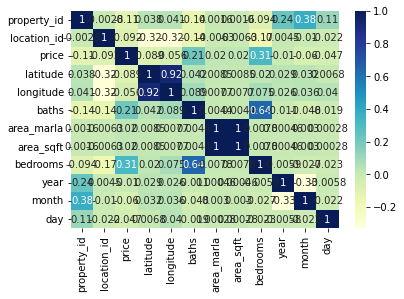

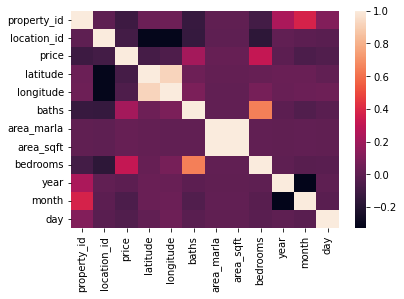

In [15]:
# plotting correlation heatmap
sd = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) # for small dataset
plt.show()
ld = sns.heatmap(df.corr()) # for large dataset
plt.show()

# Short Details

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144013 entries, 0 to 191392
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_id    144013 non-null  int64         
 1   location_id    144013 non-null  int64         
 2   page_url       144013 non-null  object        
 3   property_type  144013 non-null  object        
 4   price          144013 non-null  int64         
 5   price_bin      144013 non-null  object        
 6   location       144013 non-null  object        
 7   city           144013 non-null  object        
 8   province_name  144013 non-null  object        
 9   locality       144013 non-null  object        
 10  latitude       144013 non-null  float64       
 11  longitude      144013 non-null  float64       
 12  baths          144013 non-null  int64         
 13  area           144013 non-null  object        
 14  area_marla     144013 non-null  float64       
 15  

# Numarical values short describe

In [17]:
df.describe().T     # transpose

,count,mean,std,min,25%,50%,75%,max
property_id,144013.0,1.634658e+07,1.634215e+06,86575.000000,1.612579e+07,1.696419e+07,1.722522e+07,1.769386e+07
location_id,144013.0,4.186125e+03,3.704307e+03,3.000000,1.242000e+03,3.214000e+03,7.104000e+03,1.424600e+04
price,144013.0,1.756638e+07,3.608480e+07,0.000000,8.500000e+04,7.800000e+06,1.950000e+07,2.000000e+09
latitude,144013.0,3.012832e+01,3.612550e+00,24.749425,2.500530e+01,3.146249e+01,3.355084e+01,7.318409e+01
longitude,144013.0,7.162138e+01,3.065719e+00,66.863657,6.718286e+01,7.307779e+01,7.424677e+01,7.456473e+01
baths,144013.0,2.786748e+00,2.526077e+00,0.000000,0.000000e+00,3.000000e+00,4.000000e+00,4.030000e+02
area_marla,144013.0,1.584714e+01,5.090717e+02,0.000000,5.000000e+00,8.000000e+00,1.400000e+01,1.244440e+05
area_sqft,144013.0,4.314400e+03,1.385953e+05,0.000000,1.361250e+03,2.178010e+03,3.811510e+03,3.388000e+07
bedrooms,144013.0,3.140904e+00,1.930828e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,6.800000e+01
year,144013.0,2.018991e+03,9.360237e-02,2018.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03


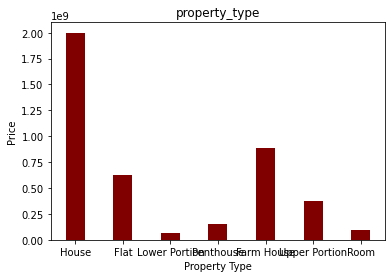

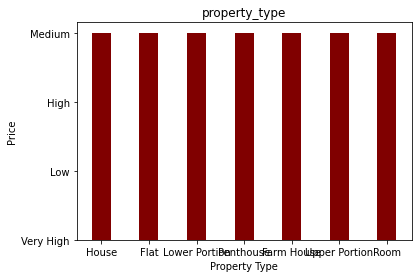

In [18]:
plt.bar(df['property_type'], df['price'], color ='maroon', width = 0.4)
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.title("property_type")
plt.show()
plt.bar(df['property_type'], df['price_bin'], color ='maroon', width = 0.4)
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.title("property_type")
plt.show()

In [19]:
# # Draw a scatter plot
# df.plot.scatter(x = 'property_type', y = 'price', s = 'price', c = 'red');

In [20]:
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt
# from matplotlib import style
# style.use('ggplot')

# fig = plt.figure()
# ax1 = fig.add_subplot(111, projection='3d')

# x3 = df['date_added']
# y3 = df['price']

# ax1.bar3d(x3, y3)


# ax1.set_xlabel('x axis')
# ax1.set_ylabel('y axis')
# ax1.set_zlabel('z axis')

# plt.show()